In [3]:
from yunchieh_plotlib.Plot_function import plot_tsne
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

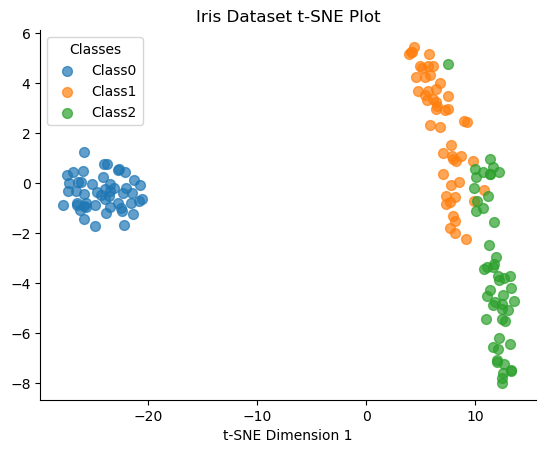

In [4]:
#function example

iris = load_iris()
X = iris.data
y = iris.target


fig, ax = plt.subplots()
plot_tsne(X, 
          y,
          ax,
          s=50,
          alpha=0.7,
          set_title={'label':"Iris Dataset t-SNE Plot"},
          set_xlabel="t-SNE Dimension 1",
        )
   
plt.show()
